<a href="https://colab.research.google.com/github/EErlando/Quarterly-Bytes/blob/main/notebooks/2_exploratory_data_analysis/JP_Morgan_EDA_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard Config Section

In [24]:
# === COLAB SETUP ===
import os

IS_COLAB = True
REPO_URL = "https://github.com/EErlando/Quarterly-Bytes.git"
REPO_NAME = "Quarterly-Bytes"

# Clone the GitHub repo if not already cloned
if not os.path.exists(REPO_NAME):
    !git clone {REPO_URL}

# Change working directory to the repo
%cd {REPO_NAME}


Cloning into 'Quarterly-Bytes'...
remote: Enumerating objects: 388, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 388 (delta 45), reused 61 (delta 19), pack-reused 278 (from 1)
Receiving objects: 100% (388/388), 199.03 MiB | 31.19 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Updating files: 100% (152/152), done.
/content/Quarterly-Bytes/Quarterly-Bytes


In [25]:
ALL_TRANSCRIPTS_PATH = os.path.join("data", "processed", "Goldman Sachs", "qna_df.csv")
df = pd.read_csv(ALL_TRANSCRIPTS_PATH)


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [27]:
import pandas as pd

# Load the CSV
df = pd.read_csv(ALL_TRANSCRIPTS_PATH)

# Print shape and columns
print("✅ DataFrame loaded!")
print("📊 Shape:", df.shape)
print("🧱 Columns:", df.columns.tolist())

# Preview first few rows
print("🔍 Head of the DataFrame:")
display(df.head())


✅ DataFrame loaded!
📊 Shape: (711, 9)
🧱 Columns: ['question_order', 'question_answer_group_id', 'speaker', 'role', 'company', 'content_type', 'content', 'quarter', 'year']
🔍 Head of the DataFrame:


,question_order,question_answer_group_id,speaker,role,company,content_type,content,quarter,year
0,0,0,Glenn Schorr,NaN,Evercore,question,"so, trading question, i mean, markets busines...",3,2024
1,1,0,David Solomon,"Chairman, Chief Executive Ofﬁcer",Goldman Sachs,answer,"i appreciate the question, glenn, and i mean,...",3,2024
2,2,0,Glenn Schorr,NaN,Evercore,question,i appreciate that. this one will be a short f...,3,2024
3,3,0,Denis Coleman,Chief Financial Ofﬁcer,Goldman Sachs,answer,"glenn, its denis. i guess what i would sugges...",3,2024
4,0,1,Ebrahim Poonawala,NaN,Bank of America,question,i just had a follow-up ﬁrst on trading and ma...,3,2024


In [29]:

# 2. Drop rows where 'content' is missing
df.dropna(subset=['content'], inplace=True)

# 3. Check if any other columns have missing values
print(df.isnull().sum())

question_order                0
question_answer_group_id      0
speaker                       0
role                        352
company                       0
content_type                  0
content                       0
quarter                       0
year                          0
dtype: int64


In [30]:
# Add word count column
df['word_count'] = df['content'].str.split().apply(len)

# Total words per speaker
word_count_by_speaker = df.groupby('speaker')['word_count'].sum().sort_values(ascending=False)

print(word_count_by_speaker.head(10))


speaker
David Solomon        42066
Denis Coleman        20729
Devin Ryan            2838
Mike Mayo             2485
Steven Chubak         2304
Brennan Hawken        2252
Ebrahim Poonawala     2233
Gerard Cassidy        2191
Glenn Schorr          2058
Dennis Coleman        2033
Name: word_count, dtype: int64


In [31]:
# Number of speaking turns per speaker
appearance_count = df['speaker'].value_counts()

print(appearance_count.head(10))


speaker
David Solomon        199
Denis Coleman        144
Mike Mayo             40
Betsy Graseck         33
Devin Ryan            32
Steven Chubak         32
Ebrahim Poonawala     30
Gerard Cassidy        29
Glenn Schorr          27
Brennan Hawken        25
Name: count, dtype: int64


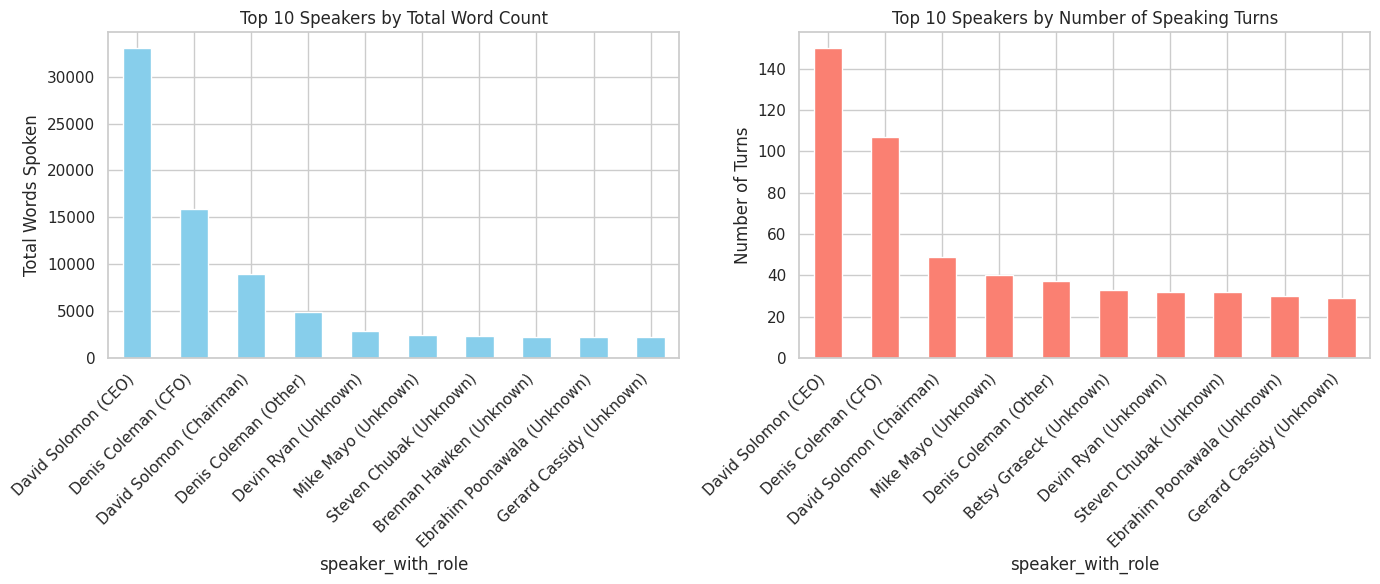

In [33]:
import matplotlib.pyplot as plt

# Clean the DataFrame
# The dropna(subset=['content']) was already done earlier, but keeping for robustness
df_clean = df.dropna(subset=['content']).copy()
df_clean['word_count'] = df_clean['content'].str.split().apply(len)

# Simplify role (map common roles)
def simplify_role(role):
    # Check if role is a string and not NaN
    if isinstance(role, str):
        role = role.lower()
        if "chief executive" in role:
            return "CEO"
        elif "chief financial" in role:
            return "CFO"
        elif "analyst" in role:
            return "Analyst"
        elif "investor relations" in role:
            return "IR"
        elif "chairman" in role:
            return "Chairman"
        elif "president" in role:
            return "President"
        elif "chief operating" in role:
            return "COO"
        else:
            return "Other"
    else:
        # Handle non-string values (like NaN)
        return "Unknown"


# Apply simplified role and create new label
df_clean['role_simple'] = df_clean['role'].apply(simplify_role)
# Ensure 'role_simple' is a string before concatenation
df_clean['speaker_with_role'] = df_clean['speaker'] + " (" + df_clean['role_simple'].astype(str) + ")"


# Top speakers by word count
top_word_counts = (
    df_clean.groupby('speaker_with_role')['word_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Top speakers by speaking turns
top_turn_counts = (
    df_clean['speaker_with_role']
    .value_counts()
    .head(10)
)

# Plotting
plt.figure(figsize=(14, 6))

# Subplot 1: Total Word Count
plt.subplot(1, 2, 1)
top_word_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Speakers by Total Word Count')
plt.ylabel('Total Words Spoken')
plt.xticks(rotation=45, ha='right')

# Subplot 2: Number of Speaking Turns
plt.subplot(1, 2, 2)
top_turn_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Speakers by Number of Speaking Turns')
plt.ylabel('Number of Turns')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Insights from the Plot "Total 10 speakers by Word Count and Speaking Turns"

Jeremy Barnum (CFO) and Jamie Dimon (CEO) are the most vocal participants, not only in total word count but also in frequency of speaking turns. This implies they are driving much of the discussion, likely providing key insights or leading the conversation.
The high engagement of analysts like Mike Mayo and Betsy L. Graseck suggests they are active in asking questions, challenging viewpoints, or seeking clarifications. In contrast, speakers with lower word counts and fewer turns might have had more passive roles or only contributed selectively.


In [39]:
# List unique roles to classify speakers
df['role'].dropna().unique()


array(['Chairman, Chief Executive Ofﬁcer', 'Chief Financial Ofﬁcer',
       'CEO, Chairman', 'CFO',
       'Chief Strategy Ofﬁcer, Head of Investor Relations',
       'Chief Executive Ofﬁcer'], dtype=object)

In [40]:
# Function to classify speaker types
def classify_speaker(role):
    if pd.isna(role):
        return 'unknown'
    role = role.lower()
    if 'chief executive officer' in role or 'chief financial officer' in role:
        return 'answer'
    elif 'analyst' in role:
        return 'question'
    else:
        return 'unknown'

# Apply the classification
df['speaker_type'] = df['role'].apply(classify_speaker)

# Quick check of results
df['speaker_type'].value_counts()


,count
speaker_type,
unknown,711


In [36]:
# Step 5.3: Create qa_type column based on speaker_type
df['qa_type'] = df['speaker_type']  # simply duplicate for now

# Check how it looks
df[['speaker', 'role', 'speaker_type', 'qa_type']].head(10)


,speaker,role,speaker_type,qa_type
0,Glenn Schorr,NaN,unknown,unknown
1,David Solomon,"Chairman, Chief Executive Ofﬁcer",unknown,unknown
2,Glenn Schorr,NaN,unknown,unknown
3,Denis Coleman,Chief Financial Ofﬁcer,unknown,unknown
4,Ebrahim Poonawala,NaN,unknown,unknown
5,David Solomon,"Chairman, Chief Executive Ofﬁcer",unknown,unknown
6,Ebrahim Poonawala,NaN,unknown,unknown
7,David Solomon,"Chairman, Chief Executive Ofﬁcer",unknown,unknown
8,Christian Bolu,NaN,unknown,unknown
9,David Solomon,"Chairman, Chief Executive Ofﬁcer",unknown,unknown


In [37]:
# Number of Q&A groups
num_groups = df['question_answer_group_id'].nunique()
print(f"Total Q&A groups: {num_groups}")

# Sample a few Q&A groups to inspect the flow
sample_groups = df['question_answer_group_id'].dropna().unique()[:3]

# Display content from a few sample groups
for group_id in sample_groups:
    print(f"\n--- Q&A Group: {group_id} ---")
    display(df[df['question_answer_group_id'] == group_id][['speaker', 'speaker_type', 'qa_type', 'content']])


Total Q&A groups: 15

--- Q&A Group: 0 ---


,speaker,speaker_type,qa_type,content
0,Glenn Schorr,unknown,unknown,"so, trading question, i mean, markets busines..."
1,David Solomon,unknown,unknown,"i appreciate the question, glenn, and i mean,..."
2,Glenn Schorr,unknown,unknown,i appreciate that. this one will be a short f...
3,Denis Coleman,unknown,unknown,"glenn, its denis. i guess what i would sugges..."
45,Ebrahim Poonawala,unknown,unknown,good morning. i guess maybe just david follow...
46,David Solomon,unknown,unknown,"well, it's hard -- i mean, it's hard for me t..."
47,Ebrahim Poonawala,unknown,unknown,that's fair . and just a follow-up on the sli...
48,David Solomon,unknown,unknown,i think you're going to see it throughout 202...
83,Glenn Schorr,unknown,unknown,so i want to talk about how we build towards ...
84,Denis Coleman,unknown,unknown,"so glenn, thank you for the question. and i t..."



--- Q&A Group: 1 ---


,speaker,speaker_type,qa_type,content
4,Ebrahim Poonawala,unknown,unknown,i just had a follow-up ﬁrst on trading and ma...
5,David Solomon,unknown,unknown,"yes. sure, ebrahim, and i appreciate the ques..."
6,Ebrahim Poonawala,unknown,unknown,understood. and just a follow-up on -- back t...
7,David Solomon,unknown,unknown,"well, i appreciate the question. and we've be..."
49,Christian Bolu,unknown,unknown,"good morning, david and denis. maybe just fol..."
...,...,...,...,...
663,Steven Chubak,unknown,unknown,so wanted to start with a question on expense...
664,David Solomon,unknown,unknown,"thanks for the question, steven. i'll start a..."
665,Denis Coleman,unknown,unknown,"sure. so if we take a step back, we look at o..."
666,Steven Chubak,unknown,unknown,that's great. and maybe just a question for m...



--- Q&A Group: 2 ---


,speaker,speaker_type,qa_type,content
8,Christian Bolu,unknown,unknown,can you hear me? i just have a question on th...
9,David Solomon,unknown,unknown,"when you have leading market shares, our glob..."
10,David Solomon,unknown,unknown,"sure, i'll start. i don't know denis might ha..."
11,Denis Coleman,unknown,unknown,"the only thing i'd amplify , which i think we..."
54,Betsy Graseck,unknown,unknown,hi. good morning.
...,...,...,...,...
618,Christian Bolu,unknown,unknown,great. thank you.
668,Ebrahim Poonawala,unknown,unknown,"i guess maybe just going back, david, you men..."
669,David Solomon,unknown,unknown,"sure. and so ﬁrst, i just want to amplify , i..."
670,Ebrahim Poonawala,unknown,unknown,that's helpful. and i guess just one follow-u...


In [38]:
# Group by Q&A group and qa_type to count questions and answers
qa_group_counts = df.groupby(['question_answer_group_id', 'qa_type']).size().unstack(fill_value=0)

# Optional: sort by number of questions
qa_group_counts = qa_group_counts.sort_values(by='question', ascending=False)

# Plot
qa_group_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Number of Questions and Answers per Q&A Group')
plt.xlabel('Q&A Group ID')
plt.ylabel('Number of Utterances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'question'

# Insights from the Plot " Number af Questions and Answers per Q&A Group"
- Group 7 and Group 9 had the highest total activity (over 100 utterances each).

- Most groups maintain a balance between questions and answers.

- A few groups (like 11–14) have very few interactions, which might be:

  - Edge cases
  - Summary/wrap-up sections
  - Incomplete data splits

- Unknowns appear in every group — could be:

  - Greetings, transitions, or misclassified segments.
  - Might be cleaned or explored further later.

Compare speaker activity across quarters

In [ ]:
# Define speaker roles mapping
speaker_roles = {
    "Jeremy Barnum": "CFO",
    "Jamie Dimon": "CEO",
    "Mike Mayo": "Analyst",
    "Betsy L. Graseck": "Analyst",
    "Erika Najarian": "Analyst",
    "Gerard Cassidy": "Analyst",
    "Ken Usdin": "Analyst",
    "Ebrahim H. Poonawala": "Analyst",
    "Steven Chubak": "Analyst",
    "James Mitchell": "Analyst",
    "Glenn Schorr": "Analyst",
    "Andrew Lim": "Analyst",
    "Jim Mitchell": "Analyst",
    "Matt O’Connor": "Analyst",
    "Charles W. Peabody": "Analyst",
    "Ryan Kenny": "Analyst",
    "John McDonald": "Analyst",
    "Saul Martinez": "Analyst",
    "Manan Gosalia": "Analyst"

}

# Map roles to speakers
speaker_activity_df['role'] = speaker_activity_df['speaker'].map(speaker_roles)
speaker_activity_df['speaker_with_role'] = speaker_activity_df['speaker'] + " (" + speaker_activity_df['role'].fillna("Unknown") + ")"


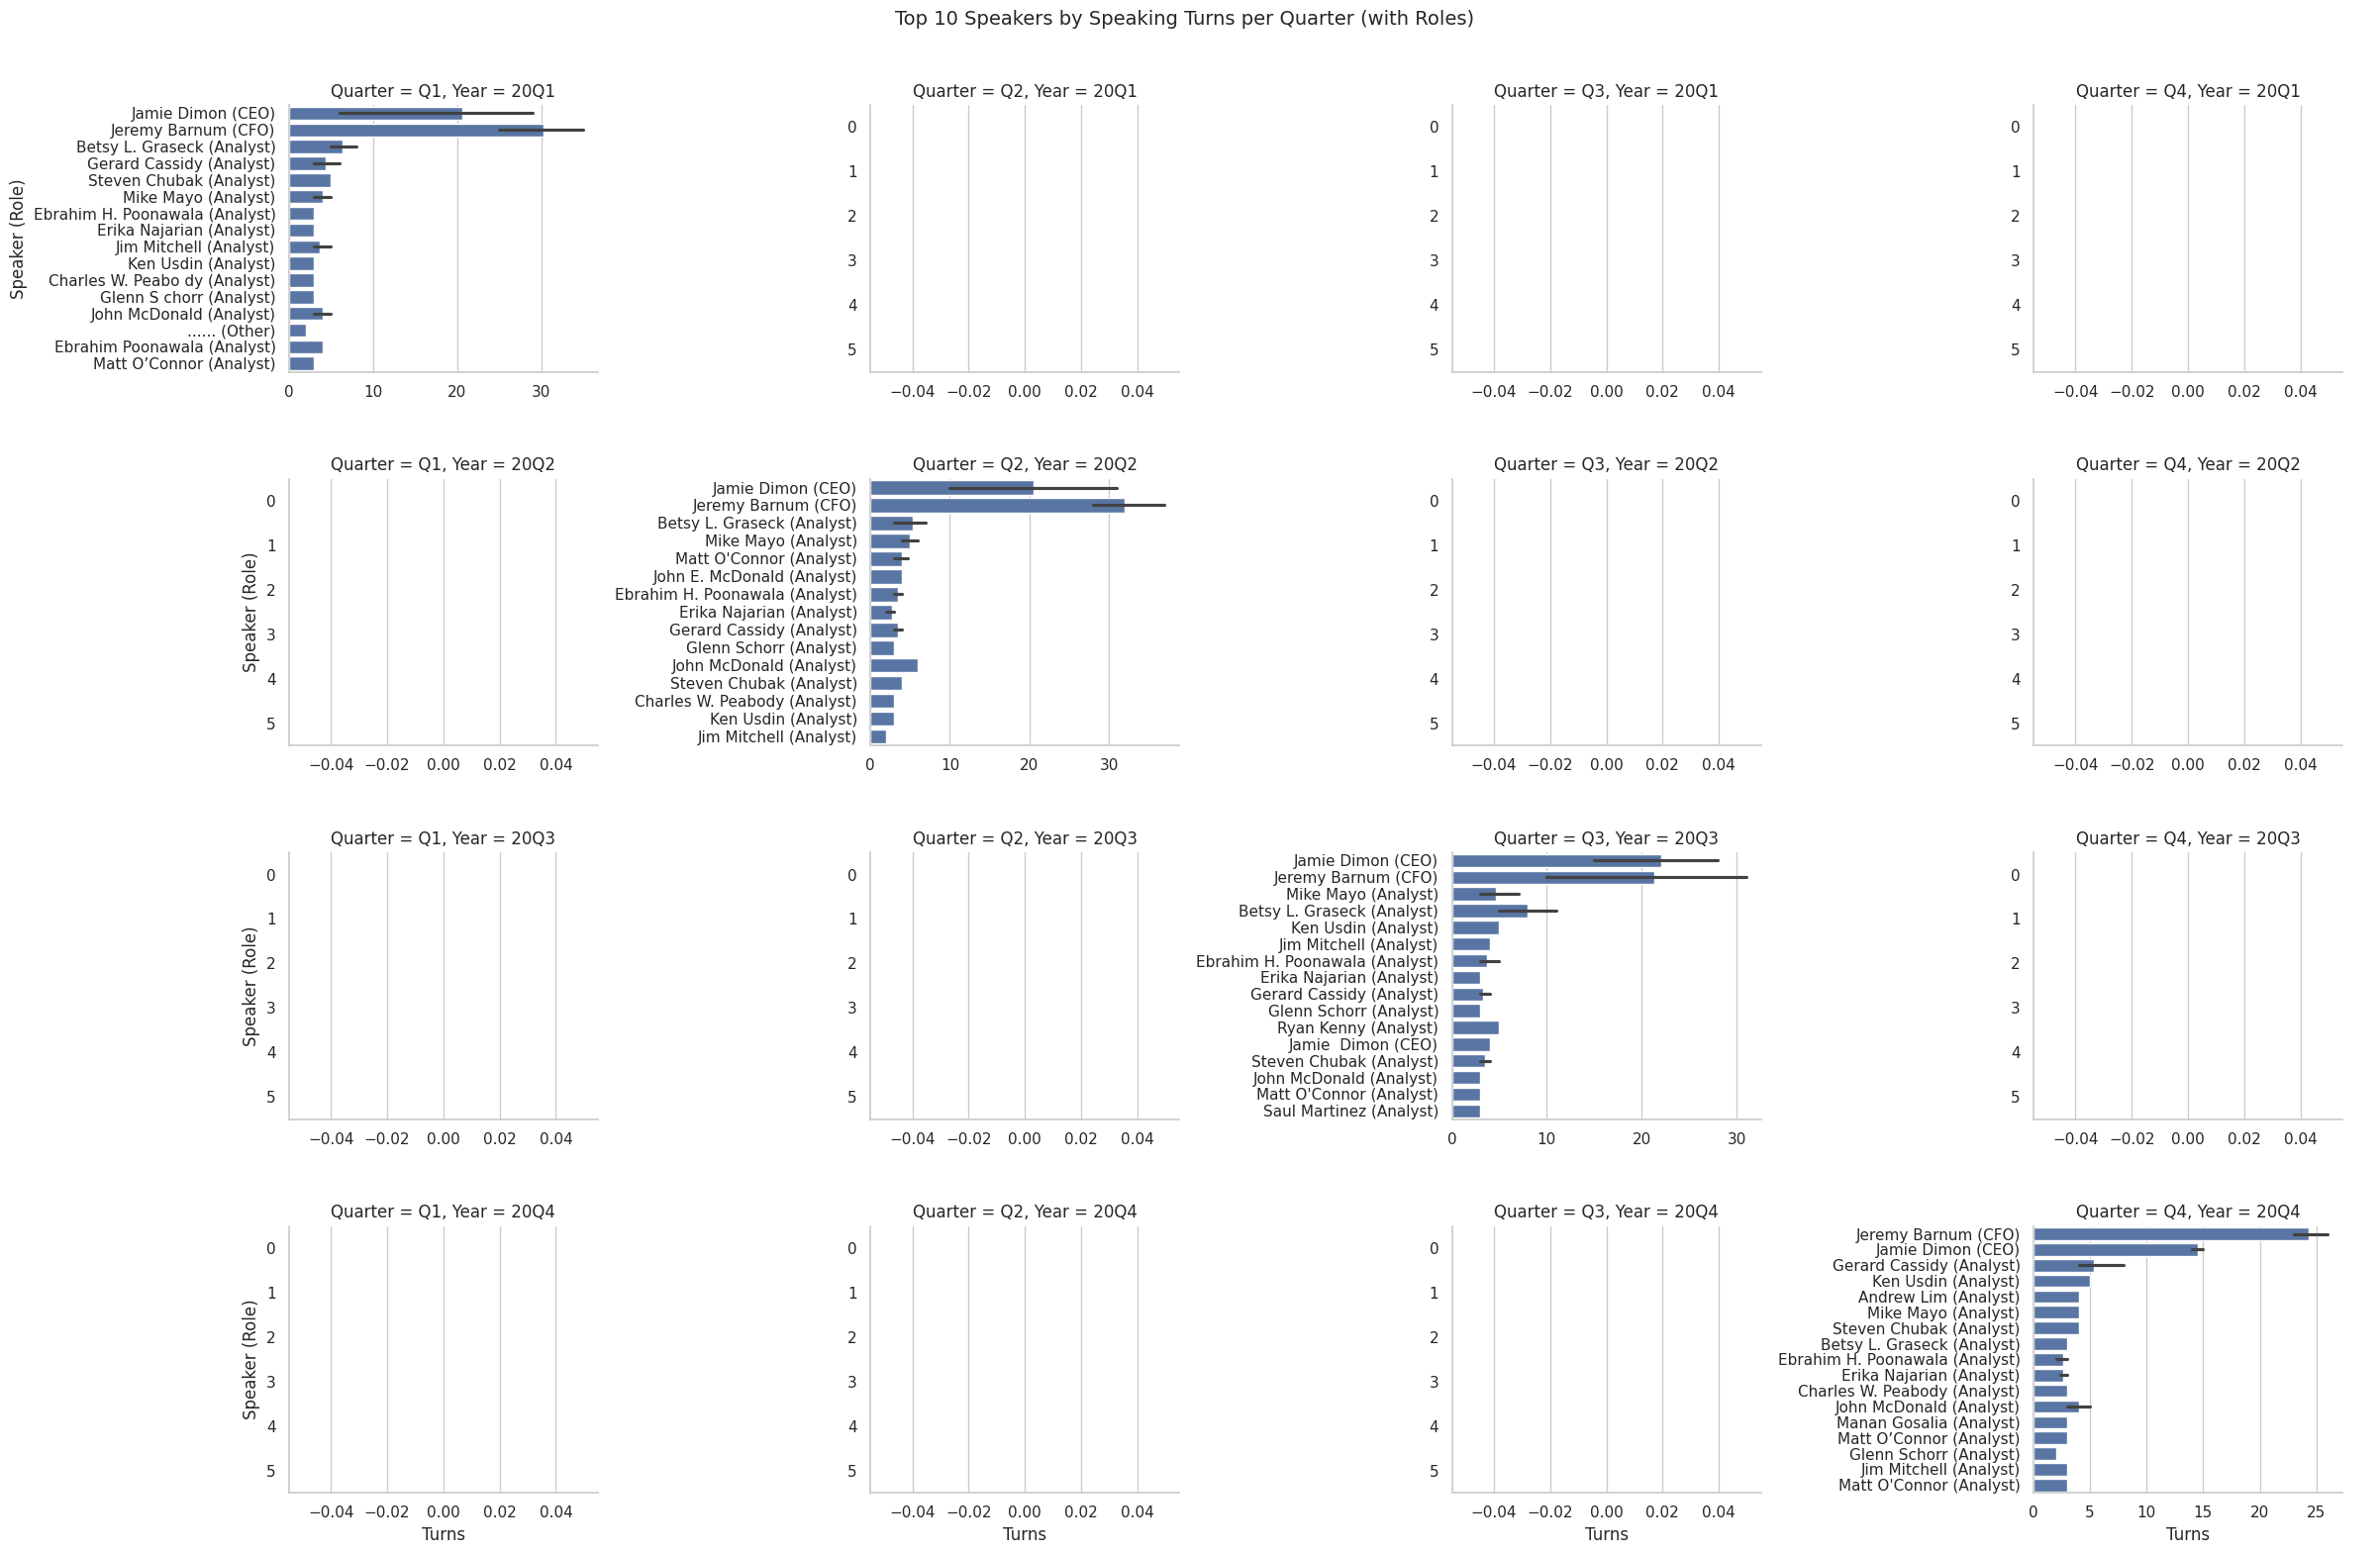

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Split year and quarter ---
top_speakers_per_quarter['year'] = top_speakers_per_quarter['quarter'].str[:2]
top_speakers_per_quarter['quarter_num'] = top_speakers_per_quarter['quarter'].str[-2:]

# Optional: sort year and quarter
top_speakers_per_quarter['year'] = '20' + top_speakers_per_quarter['year']  # e.g., '22' → '2022'
top_speakers_per_quarter['quarter_num'] = pd.Categorical(
    top_speakers_per_quarter['quarter_num'],
    categories=['Q1', 'Q2', 'Q3', 'Q4'],
    ordered=True
)
top_speakers_per_quarter = top_speakers_per_quarter.sort_values(['year', 'quarter_num'])

# --- Plot ---
g = sns.catplot(
    data=top_speakers_per_quarter,
    kind='bar',
    col='quarter_num',
    row='year',
    x='turns',
    y='speaker_with_role',
    height=4,
    aspect=1.5,
    sharex=False,
    sharey=False
)

g.set_titles("Quarter = {col_name}, Year = {row_name}")
g.set_axis_labels("Turns", "Speaker (Role)")
g.fig.subplots_adjust(top=0.92, hspace=0.4)
g.fig.suptitle("Top 10 Speakers by Speaking Turns per Quarter (with Roles)", fontsize=14)

plt.show()


## Insights from the Plot "Top 10 Speakers by Speaking Turns per Quarter"

- 2022
No data for Q1.
  - Jamie Dimon (CEO) and Jeremy Barnum (CFO) are consistently among the top speakers.
  - Analysts like Mike Mayo, Betsy L. Graseck, and Gerard Cassidy are frequently present.

- 2023
  - Jamie Dimon and Jeremy Barnum maintain their top positions.
  - Analysts such as Erika Najarian, Ebrahim H. Poonawala, and Charles Peabody appear often.

- 2024
  - Jeremy Barnum dominates in Q1 and Q4.
  - Speaking distribution among analysts seems broader in Q2 and Q3.

- 2025
Only Q1 data available
  - Jeremy Barnum and Jamie Dimon remains as the top spekers.




In [ ]:
# Display a sample
df[['speaker', 'role']].drop_duplicates().head(10)

,speaker,role
0,Steven Chubak,"Analyst, Wolfe Research LLC"
1,Jeremy Barnum,Chief Financial Officer & Member -Operating Co...
2,Jamie Dimon,"Chairman & Chief Executive Officer, JPMorgan C..."
8,Glenn Schorr,"Analyst, Evercore ISI"
11,Glenn Schorr,"Analyst, Ever core ISI"
12,Jamie Dimon,"Chairman & Chief Executive Officer, JPMo rgan ..."
15,John E. McDonald,"Analyst, Autonomous Research"
16,Jeremy Barnum,Chief Financial Officer & Member -Operating Co...
18,Jeremy Barnum,Chief Financial Officer & Member -Operating C...
19,Jamie Dimon,"Chairman & Chief Execut ive Officer, JPMorgan ..."


In [ ]:
def normalize_role(role):
    if pd.isna(role):
        return "Unknown"
    role = role.lower()

    if "chief executive officer" in role:
        return "CEO"
    elif "chief financial officer" in role:
        return "CFO"
    elif role.startswith("analyst"):
        return "Analyst"
    elif role.startswith("operator"):
        return "Operator"
    else:
        return "Other"

# Apply normalization
df['normalized_role'] = df['role'].apply(normalize_role)

# Preview
df[['role', 'normalized_role']].drop_duplicates().head(10)


,role,normalized_role
0,"Analyst, Wolfe Research LLC",Analyst
1,Chief Financial Officer & Member -Operating Co...,CFO
2,"Chairman & Chief Executive Officer, JPMorgan C...",CEO
8,"Analyst, Evercore ISI",Analyst
11,"Analyst, Ever core ISI",Analyst
12,"Chairman & Chief Executive Officer, JPMo rgan ...",CEO
15,"Analyst, Autonomous Research",Analyst
16,Chief Financial Officer & Member -Operating Co...,CFO
18,Chief Financial Officer & Member -Operating C...,CFO
19,"Chairman & Chief Execut ive Officer, JPMorgan ...",Other


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    # Lowercase, remove punctuation, split
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return words

# Apply cleaning to a new column
df['cleaned_words'] = df['content'].apply(clean_text)

# Preview
display(df[['normalized_role', 'cleaned_words']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,normalized_role,cleaned_words
0,Analyst,"[hey, good, morning, jeremy, hey, good, mornin..."
1,CFO,"[yeah, steve, good, question, obviously, youre..."
2,CEO,"[intend, drive, scb, reducing, things, created]"
3,Analyst,"[fair, enough, follow, loan, growth, outlook, ..."
4,CFO,"[yeah, weve, talked, know, steve, sort, mid, t..."


In [ ]:
from collections import Counter

# Group words by role
role_word_lists = df.groupby('normalized_role')['cleaned_words'].sum()

# Get top 10 most frequent words per role
top_words_by_role = {
    role: Counter(words).most_common(10)
    for role, words in role_word_lists.items()
}

# Display top words
import pprint
pprint.pprint(top_words_by_role)


{'Analyst': [('think', 141),
             ('good', 124),
             ('thank', 120),
             ('youre', 119),
             ('jeremy', 95),
             ('morning', 92),
             ('thanks', 91),
             ('okay', 86),
             ('like', 86),
             ('question', 83)],
 'CEO': [('going', 162),
         ('think', 132),
         ('like', 107),
         ('dont', 80),
         ('things', 79),
         ('thats', 79),
         ('would', 69),
         ('people', 68),
         ('good', 67),
         ('look', 64)],
 'CFO': [('think', 283),
         ('bit', 204),
         ('little', 180),
         ('yeah', 179),
         ('thats', 166),
         ('see', 156),
         ('would', 118),
         ('sort', 116),
         ('like', 115),
         ('question', 110)],
 'Other': [('think', 49),
           ('yeah', 40),
           ('thats', 36),
           ('going', 34),
           ('like', 29),
           ('see', 27),
           ('right', 26),
           ('weve', 26),
           ('point

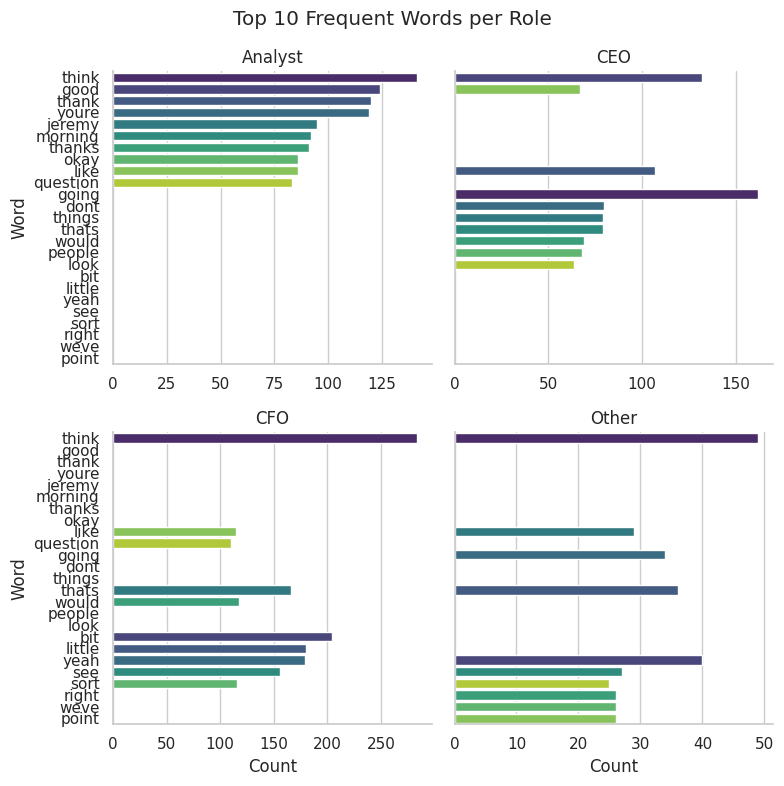

In [ ]:

# Convert to DataFrame for easier plotting
rows = []
for role, word_counts in top_words_by_role.items():
    for word, count in word_counts:
        rows.append({'Role': role, 'Word': word, 'Count': count})

df_words = pd.DataFrame(rows)

# Set up the plot
g = sns.FacetGrid(df_words, col="Role", col_wrap=2, sharex=False, height=4)
g.map_dataframe(sns.barplot, x="Count", y="Word", palette="viridis")

# Titles and layout
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Count", "Word")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 Frequent Words per Role")

plt.tight_layout()
plt.show()


In [ ]:
def clean_text(text):
    if pd.isna(text):
        return ""

    # Lowercase, remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()

    # Define additional filler words
    filler_words = {
        "yeah", "like", "okay", "ok", "um", "uh", "youre", "i'm", "weve", "dont", "thats",
        "think", "bit", "sort", "little", "right", "well", "thanks", "thank", "hi", "hello"
    }

    # Remove both standard and filler stopwords
    words = [w for w in words if w not in stop_words and w not in filler_words and len(w) > 2]
    return words


In [ ]:
df['cleaned_words'] = df['content'].apply(clean_text)
role_word_lists = df.groupby('normalized_role')['cleaned_words'].sum()
from collections import Counter

top_words_by_role = {
    role: Counter(words).most_common(10)
    for role, words in role_word_lists.items()
}


# Flatten dictionary to rows
plot_data = []
for role, words in top_words_by_role.items():
    for word, count in words:
        plot_data.append({'Role': role, 'Word': word, 'Count': count})

plot_df = pd.DataFrame(plot_data)


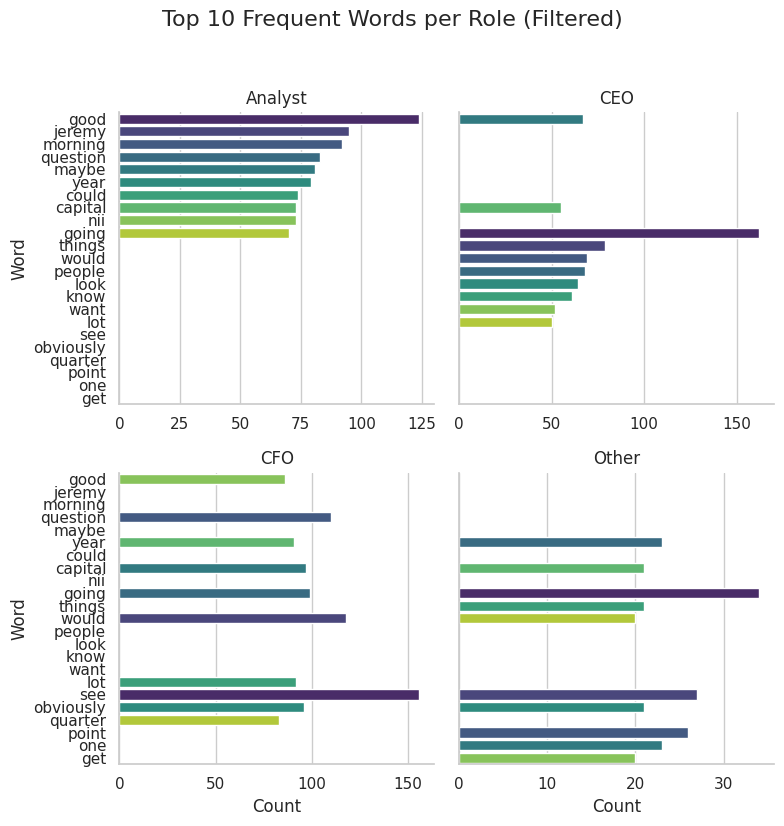

In [ ]:
# plot
g = sns.FacetGrid(plot_df, col="Role", col_wrap=2, height=4, sharex=False)
g.map_dataframe(sns.barplot, x="Count", y="Word", palette="viridis")
g.set_titles("{col_name}")
g.set_axis_labels("Count", "Word")
g.fig.suptitle("Top 10 Frequent Words per Role (Filtered)", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


In [ ]:
# FILTER BY FINANCIAL KEY WORDS

financial_keywords = {
    "revenue", "loan", "loans", "capital", "margin", "ni", "nii", "expense", "expenses",
    "cost", "costs", "asset", "assets", "liability", "liabilities", "net", "interest",
    "income", "debt", "credit", "equity", "dividend", "tax", "profit", "loss", "liquidity",
    "return", "yield", "growth", "inflation", "rates", "spread", "valuation", "earnings",
    "fee", "fees", "cash", "guidance", "forecast", "portfolio", "deposit", "deposits",
    "risk", "hedge", "investment", "investments", "buyback", "underwriting"
}
def filter_financial_terms(word_list):
    return [w for w in word_list if w in financial_keywords]

df['financial_words'] = df['cleaned_words'].apply(filter_financial_terms)


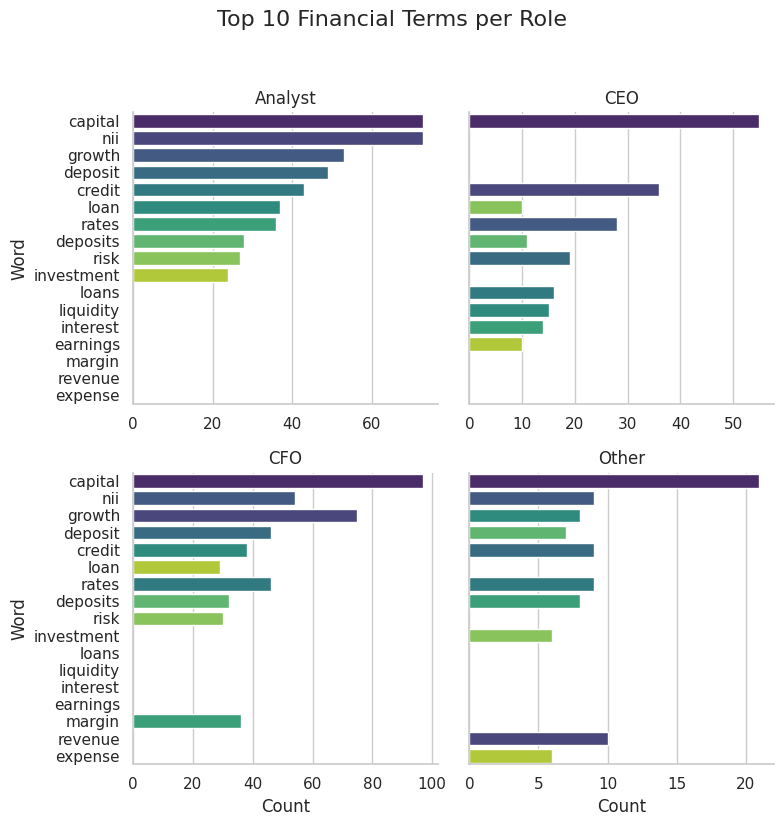

In [ ]:
# Group words by role
role_word_lists = df.groupby('normalized_role')['financial_words'].sum()

# Top 10 words per role
top_words_by_role = {
    role: Counter(words).most_common(10)
    for role, words in role_word_lists.items()
}

# Prepare for plotting
plot_data = []
for role, words in top_words_by_role.items():
    for word, count in words:
        plot_data.append({'Role': role, 'Word': word, 'Count': count})
plot_df = pd.DataFrame(plot_data)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(plot_df, col="Role", col_wrap=2, height=4, sharex=False)
g.map_dataframe(sns.barplot, x="Count", y="Word", palette="viridis")
g.set_titles("{col_name}")
g.set_axis_labels("Count", "Word")
g.fig.suptitle("Top 10 Financial Terms per Role", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


## Insights from the Plot "Top 10 Financial Terms per Role"
- Common Across Roles:
  - “capital” is the most frequently used term across all roles — especially dominant for CFOs and Analysts.
  - Other shared terms include:
“nii” (Net Interest Income), “growth,” “deposit,” “credit,” “loan,” “rates,” “risk,” and “deposits.”
- Analyst:
  - Strong emphasis on capital, nii, and growth.
  - Talks more frequently about credit, deposits, investment, and liquidity.
  - Uses a broader vocabulary with moderate frequency across all top terms.
- CEO:
  - Focuses heavily on capital and growth.
  - Fewer distinct financial terms mentioned, suggesting higher-level or more strategic language.
  - Still uses “loan,” “deposit,” “rates,” and “risk.”
- CFO:
  - Uses the most technical financial vocabulary.
  - Very high usage of capital, growth, and nii.
  - More detailed talk on rates, deposits, risk, interest, and earnings.
- Other:
  - Much lower frequency overall.
  - Still mentions core terms like capital, loan, rates, and deposit, but less consistently.
  - Some mention of margin, revenue, interest.

Summary:

CFOs are the most quantitative and technical, leading in financial term usage.
Analysts ask a wide variety of financial questions.
CEOs focus on strategic keywords like capital and growth, but speak less often in detailed financial jargon. Other roles contribute less frequently to financial term usage.

In [ ]:
## Compare vocabulary overlap between roles (e.g., CEO vs Analyst)

# Get Word Sets Per Role
# Convert role word lists to sets
role_word_sets = {
    role: set(words) for role, words in role_word_lists.items()
}

# Compare Overlap and Unique Terms
# Example: CEO vs Analyst
ceo_words = role_word_sets.get('CEO', set())
analyst_words = role_word_sets.get('Analyst', set())

shared_words = ceo_words & analyst_words
ceo_unique = ceo_words - analyst_words
analyst_unique = analyst_words - ceo_words

print("🔁 Shared Words (CEO ∩ Analyst):")
print(shared_words)

print("\n🧠 Unique to CEO:")
print(ceo_unique)

print("\n🧪 Unique to Analyst:")
print(analyst_unique)


🔁 Shared Words (CEO ∩ Analyst):
{'deposit', 'investment', 'loan', 'capital', 'dividend', 'inflation', 'earnings', 'expense', 'investments', 'credit', 'asset', 'return', 'risk', 'growth', 'cash', 'assets', 'guidance', 'equity', 'loans', 'portfolio', 'net', 'deposits', 'loss', 'expenses', 'income', 'liquidity', 'buyback', 'cost', 'interest', 'yield', 'underwriting', 'nii', 'debt', 'rates', 'forecast'}

🧠 Unique to CEO:
{'spread', 'hedge', 'valuation'}

🧪 Unique to Analyst:
{'liability', 'margin', 'revenue', 'fee', 'fees', 'costs'}


In [ ]:
pip install matplotlib-venn

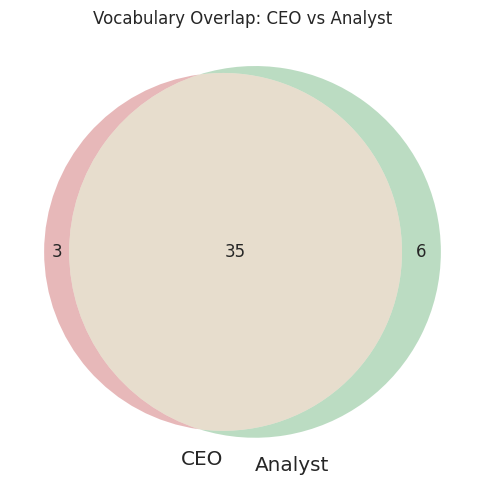

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
venn2([ceo_words, analyst_words], set_labels=('CEO', 'Analyst'))
plt.title("Vocabulary Overlap: CEO vs Analyst")
plt.show()


In [ ]:
## Compare vocabulary overlap and uniqueness across all roles

role_word_sets = {
    role: set(words) for role, words in role_word_lists.items()
}

# Create Pairwise Overlap Table
from itertools import combinations

print("🔍 Pairwise Word Overlap Between Roles:\n")
for role1, role2 in combinations(role_word_sets.keys(), 2):
    set1 = role_word_sets[role1]
    set2 = role_word_sets[role2]

    shared = set1 & set2
    only1 = set1 - set2
    only2 = set2 - set1

    print(f"🟢 Shared Words ({role1} ∩ {role2}) [{len(shared)}]:")
    print(sorted(shared)[:10], "...")  # preview only

    print(f"🔵 Unique to {role1} [{len(only1)}]: {sorted(only1)[:5]}")
    print(f"🟣 Unique to {role2} [{len(only2)}]: {sorted(only2)[:5]}\n")


🔍 Pairwise Word Overlap Between Roles:

🟢 Shared Words (Analyst ∩ CEO) [35]:
['asset', 'assets', 'buyback', 'capital', 'cash', 'cost', 'credit', 'debt', 'deposit', 'deposits'] ...
🔵 Unique to Analyst [6]: ['costs', 'fee', 'fees', 'liability', 'margin']
🟣 Unique to CEO [3]: ['hedge', 'spread', 'valuation']

🟢 Shared Words (Analyst ∩ CFO) [41]:
['asset', 'assets', 'buyback', 'capital', 'cash', 'cost', 'costs', 'credit', 'debt', 'deposit'] ...
🔵 Unique to Analyst [0]: []
🟣 Unique to CFO [4]: ['liabilities', 'spread', 'tax', 'valuation']

🟢 Shared Words (Analyst ∩ Other) [32]:
['assets', 'capital', 'cash', 'cost', 'costs', 'credit', 'deposit', 'deposits', 'dividend', 'earnings'] ...
🔵 Unique to Analyst [9]: ['asset', 'buyback', 'debt', 'fee', 'guidance']
🟣 Unique to Other [1]: ['tax']

🟢 Shared Words (CEO ∩ CFO) [37]:
['asset', 'assets', 'buyback', 'capital', 'cash', 'cost', 'credit', 'debt', 'deposit', 'deposits'] ...
🔵 Unique to CEO [1]: ['hedge']
🟣 Unique to CFO [8]: ['costs', 'fee', 'f

In [ ]:

from itertools import combinations

# Create role sets (if not already created)
role_word_sets = {role: set(words) for role, words in role_word_lists.items()}

# Initialize DataFrame
roles = list(role_word_sets.keys())
jaccard_df = pd.DataFrame(index=roles, columns=roles)

# Fill with Jaccard similarity
for r1 in roles:
    for r2 in roles:
        set1, set2 = role_word_sets[r1], role_word_sets[r2]
        intersection = len(set1 & set2)
        union = len(set1 | set2)
        jaccard = intersection / union if union else 0
        jaccard_df.loc[r1, r2] = jaccard

# Convert to float
jaccard_df = jaccard_df.astype(float)


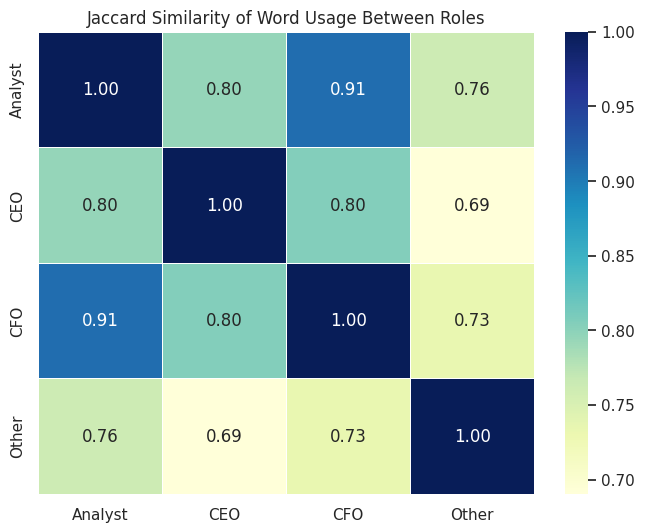

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(jaccard_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Jaccard Similarity of Word Usage Between Roles")
plt.show()


## Insights from the Plot "Jaccard Similarity of Word Usage Between Roles"

- Highest Similarity:

Analyst vs. CFO: 0.91

Strong overlap in vocabulary — likely due to both roles focusing on financial details and operational performance.

- Moderate Similarity:

Analyst vs. CEO: 0.80

CFO vs. CEO: 0.80

CEOs share a good amount of vocabulary with both Analysts and CFOs, but not as much as between Analyst/CFO.

- Lowest Similarity:

CEO vs. Other: 0.69

Indicates “Other” roles use distinct language, possibly more administrative or contextual.

## Summary:
Analysts and CFOs speak the most similarly in terms of word usage.

CEOs align moderately with Analysts and CFOs.

Other roles differ the most, particularly from CEOs, highlighting varied communication styles or focuses.


In [ ]:
!pip install upsetplot


In [ ]:
from upsetplot import UpSet
from collections import defaultdict

# Flatten all words into a map of word → roles it's used in
word_roles_map = defaultdict(set)
for role, words in role_word_sets.items():
    for word in words:
        word_roles_map[word].add(role)

# Convert to a DataFrame suitable for UpSet
rows = []
for word, roles in word_roles_map.items():
    row = {role: (role in roles) for role in role_word_sets.keys()}
    row['word'] = word
    rows.append(row)

upset_df = pd.DataFrame(rows).set_index(list(role_word_sets.keys()))


<Figure size 1200x800 with 0 Axes>

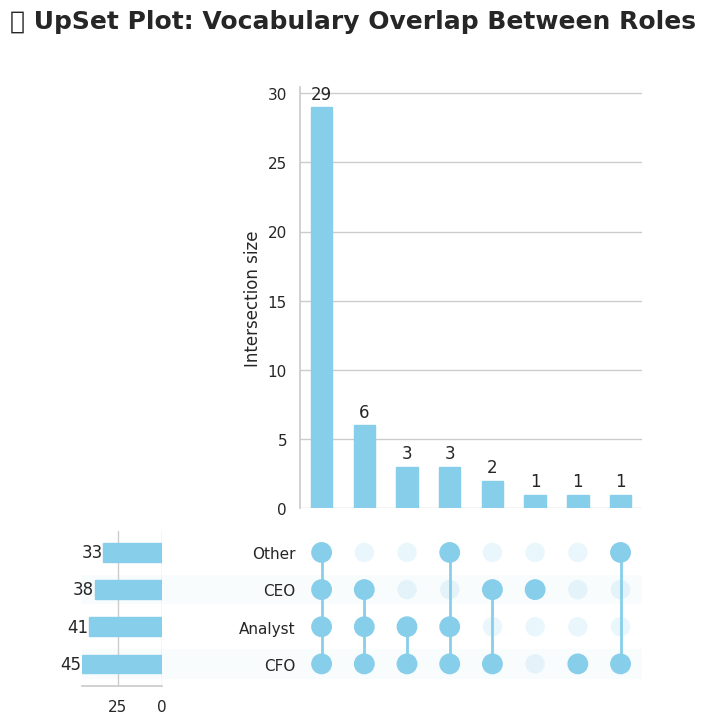

In [ ]:
from upsetplot import from_indicators
from collections import defaultdict

# Flatten all words into a map of word → roles it's used in
word_roles_map = defaultdict(set)
for role, words in role_word_sets.items():
    for word in words:
        word_roles_map[word].add(role)

# Convert to a DataFrame suitable for UpSet
rows = []
for word, roles in word_roles_map.items():
    row = {role: (role in roles) for role in role_word_sets.keys()}
    row['word'] = word
    rows.append(row)

upset_df = pd.DataFrame(rows)

# Reset the index so that the role names become columns
upset_df = upset_df.set_index(list(role_word_sets.keys())).reset_index()

# Count occurrence combinations
data = from_indicators(list(role_word_sets.keys()), upset_df)

# Plot
plt.figure(figsize=(12, 8))

upset = UpSet(
    data,
    show_counts=True,
    sort_by='cardinality',
    element_size=40,
    intersection_plot_elements=10,  # Show top 10 intersections
    facecolor="skyblue",
)

# Plot and customize
upset.plot()

plt.suptitle("🔍 UpSet Plot: Vocabulary Overlap Between Roles", fontsize=18, fontweight='bold')
plt.subplots_adjust(top=0.88)  # Tighter spacing

plt.show()

## Insights from the Plot "Vocabulary Overlap Between Roles"
- Largest Overlap:
29 words are shared by all four roles — Analyst, CEO, CFO, and Other.

This indicates a core financial vocabulary that is universally used.

- Smaller Intersections:
6 words are shared by Analyst, CEO, and CFO — excluding “Other”.

- word overlaps appear in:

Analyst & CFO

Analyst, CFO & Other

- Unique Vocabulary:
Each of the following combinations has only 1 or 2 unique shared words:

CEO only

CFO only

CFO & Other

Analyst & Other

- Total Vocabulary Size per Role (left bar chart):
CFO: 45 words

Analyst: 41 words

CEO: 38 words

Other: 33 words

## Summary:
There is a strong shared vocabulary across all roles (especially 29 common terms).

CFOs and Analysts share the largest amount of vocabulary outside of the full group.

Roles like “Other” tend to contribute more unique or less shared vocabulary.

The diversity of shared terms shrinks significantly once fewer roles are involved.



In [ ]:

import plotly.graph_objects as go
from collections import defaultdict

# Step 1: Build word_roles_map → word: set(roles)
word_roles_map = defaultdict(set)
for role, words in role_word_sets.items():
    for word in words:
        word_roles_map[word].add(role)

# Step 2: Count word intersections for all role combinations
combination_counts = defaultdict(int)
for roles in word_roles_map.values():
    key = tuple(sorted(roles))
    combination_counts[key] += 1

# Step 3: Convert to DataFrame
combo_data = []
for combo, count in combination_counts.items():
    label = " + ".join(combo)  # readable label
    combo_data.append({'Role Combination': label, 'Count': count})

df_combo = pd.DataFrame(combo_data)
df_combo = df_combo.sort_values(by='Count', ascending=False)

# Step 4: Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_combo['Role Combination'],
    y=df_combo['Count'],
    text=df_combo['Count'],
    textposition='auto',
    marker=dict(color='lightskyblue'),
))

fig.update_layout(
    title="🔍 Interactive UpSet-style Plot: Vocabulary Overlap Between Roles",
    xaxis_title="Role Combination",
    yaxis_title="Intersection Size",
    template="plotly_white",
    height=800
)

fig.show()


In [ ]:
from collections import Counter

# Limit to top N frequent words per role
top_n = 100
role_word_sets = {
    role: set([w for w, _ in Counter(words).most_common(top_n)])
    for role, words in role_word_lists.items()
}


In [ ]:
from itertools import combinations

# Example: Get shared words for 3 roles
shared_across = set.intersection(
    role_word_sets['Analyst'], role_word_sets['CEO'], role_word_sets['CFO']
)
print("Shared across Analyst, CEO, CFO:", shared_across)

# Unique to CEO
unique_ceo = role_word_sets['CEO'] - (
    role_word_sets['Analyst'] | role_word_sets['CFO'] | role_word_sets['Other']
)
print("Unique to CEO:", unique_ceo)


Shared across Analyst, CEO, CFO: {'deposit', 'investment', 'capital', 'loan', 'dividend', 'inflation', 'earnings', 'expense', 'investments', 'credit', 'asset', 'return', 'risk', 'growth', 'cash', 'assets', 'guidance', 'equity', 'loans', 'portfolio', 'net', 'deposits', 'loss', 'expenses', 'income', 'liquidity', 'cost', 'buyback', 'interest', 'yield', 'underwriting', 'nii', 'debt', 'rates', 'forecast'}
Unique to CEO: {'hedge'}


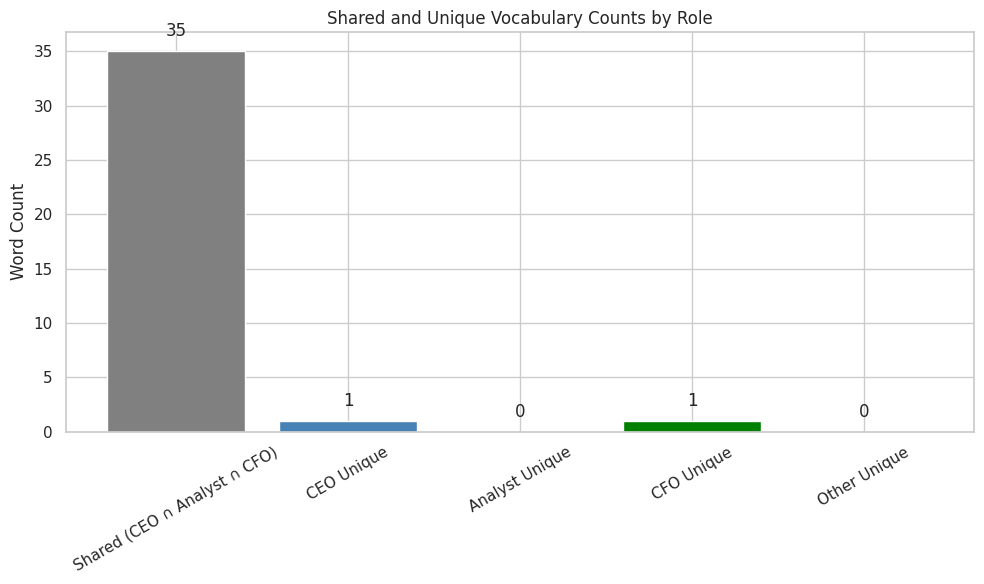

In [ ]:

# --- Vocabulary sets ---
shared_across = role_word_sets['Analyst'] & role_word_sets['CEO'] & role_word_sets['CFO']
unique_ceo = role_word_sets['CEO'] - (
    role_word_sets['Analyst'] | role_word_sets['CFO'] | role_word_sets['Other']
)
unique_analyst = role_word_sets['Analyst'] - (
    role_word_sets['CEO'] | role_word_sets['CFO'] | role_word_sets['Other']
)
unique_cfo = role_word_sets['CFO'] - (
    role_word_sets['CEO'] | role_word_sets['Analyst'] | role_word_sets['Other']
)
unique_other = role_word_sets['Other'] - (
    role_word_sets['CEO'] | role_word_sets['Analyst'] | role_word_sets['CFO']
)

# --- Prepare data for plot ---
labels = ['Shared (CEO ∩ Analyst ∩ CFO)', 'CEO Unique', 'Analyst Unique', 'CFO Unique', 'Other Unique']
counts = [len(shared_across), len(unique_ceo), len(unique_analyst), len(unique_cfo), len(unique_other)]

# --- Plot ---
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=['gray', 'steelblue', 'orange', 'green', 'purple'])

# Add value annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), ha='center', va='bottom')

plt.title('Shared and Unique Vocabulary Counts by Role')
plt.ylabel('Word Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Identify how many different speakers respond to each unique question.

Visualize how often multiple speakers address the same question.

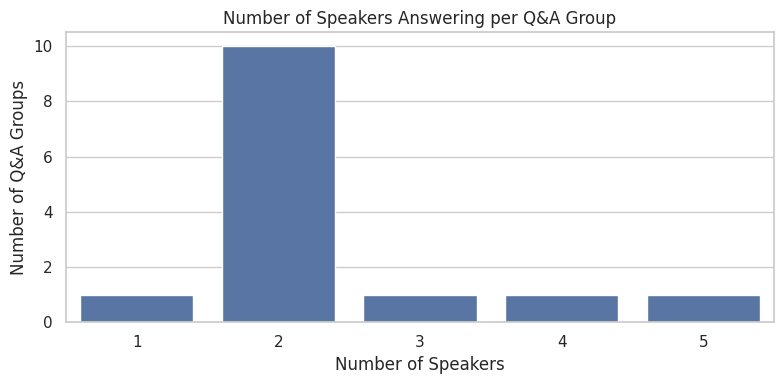

In [ ]:
# 1. Filter only answers
answers = df[df['speaker_type'] == 'answer'].copy()

# 2. Count distinct speakers who answered each question
# Need to group by a question identifier. 'question_answer_group_id' seems like the appropriate column for this.
speakers_per_question_group = (
    answers.groupby('question_answer_group_id')['speaker']
    .nunique()
    .reset_index(name='num_speakers_answered')
)

# 3. Plot the distribution of number of speakers per question group
plt.figure(figsize=(8, 4))
sns.countplot(x='num_speakers_answered', data=speakers_per_question_group)
plt.title('Number of Speakers Answering per Q&A Group')
plt.xlabel('Number of Speakers')
plt.ylabel('Number of Q&A Groups')
plt.tight_layout()
plt.show()

In [ ]:
speakers_per_question_group['num_speakers_answered'].describe()


,num_speakers_answered
count,14.000000
mean,2.357143
std,1.008208
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,5.000000


In [ ]:
multi_speaker_qas = speakers_per_question_group[speakers_per_question_group['num_speakers_answered'] > 1]
df[df['question_answer_group_id'].isin(multi_speaker_qas['question_answer_group_id'])].head(10)


,question_answer_group_id,speaker,role,content,year,quarter,word_count,speaker_type,qa_type,normalized_role,cleaned_words,financial_words
0,1,Steven Chubak,"Analyst, Wolfe Research LLC","Hey. Good morning, Jeremy. Hey, good morning,...",22,2,106,question,question,Analyst,"[hey, good, morning, jeremy, hey, good, mornin...","[capital, capital]"
1,1,Jeremy Barnum,Chief Financial Officer & Member -Operating Co...,"Yeah, Steve, good question. So, obviously, you...",22,2,170,answer,answer,CFO,"[steve, good, question, obviously, sense, didn...",[capital]
2,1,Jamie Dimon,"Chairman & Chief Executive Officer, JPMorgan C...",We intend to drive that SCB down by reducing ...,22,2,14,answer,answer,CEO,"[intend, drive, scb, reducing, things, created]",[]
3,1,Steven Chubak,"Analyst, Wolfe Research LLC",Fair enough. And just for my follow up on the ...,22,2,100,question,question,Analyst,"[fair, enough, follow, loan, growth, outlook, ...","[loan, growth, loan, growth, rates, loan, grow..."
4,1,Jeremy Barnum,Chief Financial Officer & Member -Operating Co...,"Yeah, so we've talked as you know, Steve, abou...",22,2,111,answer,answer,CFO,"[talked, know, steve, mid, tohigh, single, dig...","[loan, growth, growth, growth, loan, growth]"
5,1,Jamie Dimon,"Chairman & Chief Executive Officer, JPMorgan C...","Yeah, the only thing I would like to add is th...",22,2,34,answer,answer,CEO,"[thing, would, add, certain, loan, growth, dis...","[loan, growth, portfolio]"
6,1,Steven Chubak,"Analyst, Wolfe Research LLC",Thanks so much for taking my questions.,22,2,7,question,question,Analyst,"[much, taking, questions]",[]
7,1,Jeremy Barnum,Chief Financial Officer & Member -Operating Co...,"Thanks, Steve.",22,2,2,answer,answer,CFO,[steve],[]
8,2,Glenn Schorr,"Analyst, Evercore ISI",Hi. Thanks very much. I wonder if you could ju...,22,2,102,question,question,Analyst,"[much, wonder, could, talk, balance, meaning, ...","[growth, underwriting, capital, liquidity, buy..."
9,2,Jeremy Barnum,Chief Financial Officer & Member -Operating Co...,"Yeah, no, so, I mean, look, I think all of th...",22,2,161,answer,answer,CFO,"[mean, look, things, true, time, first, see, p...","[capital, underwriting, risk, credit]"


In [ ]:
answers.groupby('question_answer_group_id')['role'].nunique().reset_index(name='num_roles_answered')


,question_answer_group_id,num_roles_answered
0,1,7
1,2,7
2,3,7
3,4,9
4,5,6
5,6,6
6,7,6
7,8,8
8,9,5
9,10,6
